# Importing Necessary libs

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading the mtcars dataset
df = pd.read_csv('mtcars.csv')

## Exploratory Data Analysis

In [3]:
# Viweing top 5 entries
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#Summary Statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


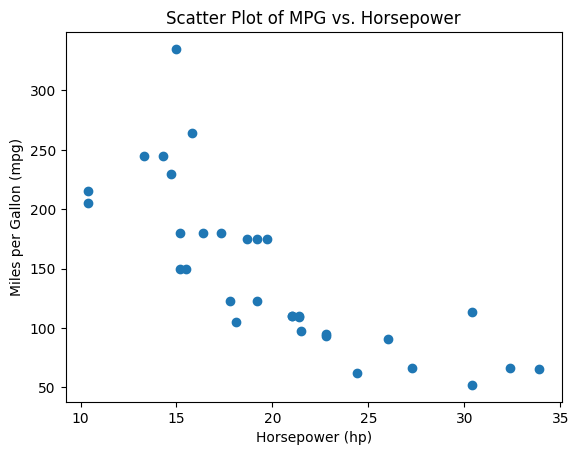

In [5]:
# Visualize data on scatter plot of mpg vs. horsepower
plt.scatter(df['mpg'], df['hp'])
plt.xlabel('Horsepower (hp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Scatter Plot of MPG vs. Horsepower')
plt.show()

In [6]:
# Checking for null values
missing_values = df.isnull().sum()
missing_values

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
# Import seaborn for creating heatmaps
import seaborn as sns

In [8]:
# Calculating correlation matrix
correlation_matrix = df.corr()

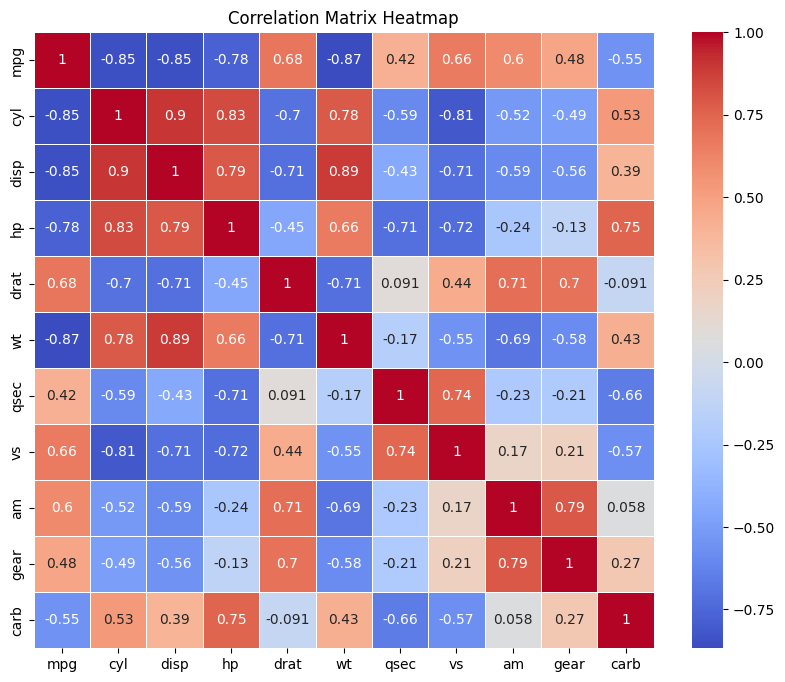

In [9]:
# Creating heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Simple Linear Regression

In [10]:
# Select predictor and target variables
X = df[['hp']]
y = df['mpg']

In [12]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Fitting the regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions
y_pred = simple_lr.predict(X_test)

In [15]:
# Evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = simple_lr.score(X_test, y_test)

In [16]:
# Print metrics
print(f'Simple Linear Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')


Simple Linear Regression Metrics:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 14.43
Root Mean Squared Error (RMSE): 3.80
R-squared (R²): -0.21


## Multiple Linear Regression

In [17]:
# selecting variables for Multiple Linear Regression
X_multi = df[['hp', 'wt', 'qsec']]
y_multi = df['mpg']

In [18]:
# Splitting
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)

In [19]:
# Moderl fitting
multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)

LinearRegression()

In [20]:
# predictions
y_pred_multi = multi_lr.predict(X_test_multi)

In [21]:
# Evaluation
mae_multi = metrics.mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = metrics.mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r_squared_multi = multi_lr.score(X_test_multi, y_test_multi)

In [22]:
# Print metrics
print(f'\nMultiple Linear Regression Metrics (using hp, wt, and qsec as predictors):')
print(f'Mean Absolute Error (MAE): {mae_multi:.2f}')
print(f'Mean Squared Error (MSE): {mse_multi:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_multi:.2f}')
print(f'R-squared (R²): {r_squared_multi:.2f}')


Multiple Linear Regression Metrics (using hp, wt, and qsec as predictors):
Mean Absolute Error (MAE): 2.85
Mean Squared Error (MSE): 11.98
Root Mean Squared Error (RMSE): 3.46
R-squared (R²): -0.01


## Part C: Random Forest Regressor

In [25]:
# Import RF lib
from sklearn.ensemble import RandomForestRegressor

In [26]:
# selecting predictorsd
X_rf = df.drop(['mpg', 'model'], axis=1)  # Exclude 'mpg' and 'model' columns
y_rf = df['mpg']


In [27]:
# Splitting
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)

In [28]:
# Model fitting
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train_rf, y_train_rf)


RandomForestRegressor(random_state=0)

In [29]:
# Calculating predictions
y_pred_rf = rf_regressor.predict(X_test_rf)

In [31]:
# Calculating metrics
mae_rf = metrics.mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf = rf_regressor.score(X_test_rf, y_test_rf)

In [33]:
# Printing metrics for Random Forest Regression
print('Random Forest Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared (R²): {r_squared_rf:.2f}')

Random Forest Regression Metrics:
Mean Absolute Error (MAE): 1.91
Mean Squared Error (MSE): 4.77
Root Mean Squared Error (RMSE): 2.18
R-squared (R²): 0.60
